In [1]:
import pandas as pd


In [2]:
#base de dados https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records
#objetivo prever se são Democratas ou Republicanos baseado em como eles votam
#importando o dataset
votes = pd.read_csv('house-votes-84.data')
#incluindo os cabeçalhos
votes.columns = ["Class_Name",'handicapped_infants','water_project_cost_sharing','adoption_of_the_budget_resolution','physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban','aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending','superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa']
#exportando uma cópia em csv
votes.to_csv('votes.csv', index=None,header=True)  
   

In [3]:
votes.head()

,Class_Name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [4]:
#434 linhas e 17 colunas
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class_Name                              434 non-null    object
 1   handicapped_infants                     434 non-null    object
 2   water_project_cost_sharing              434 non-null    object
 3   adoption_of_the_budget_resolution       434 non-null    object
 4   physician_fee_freeze                    434 non-null    object
 5   el_salvador_aid                         434 non-null    object
 6   religious_groups_in_schools             434 non-null    object
 7   anti_satellite_test_ban                 434 non-null    object
 8   aid_to_nicaraguan_contras               434 non-null    object
 9   mx_missile                              434 non-null    object
 10  immigration                             434 non-null    object
 11  synfue

In [5]:
print(votes.keys())

Index(['Class_Name', 'handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa'],
      dtype='object')


In [6]:
votes.shape

(434, 17)

In [7]:
#criar um gráfico com seaborn
#http://seaborn.pydata.org/generated/seaborn.countplot.html

from pandas.util.testing import assert_frame_equal
from pandas.testing import assert_frame_equal
import seaborn as sns

C:\Anaconda..novo\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


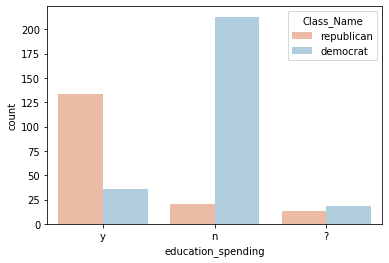

In [8]:
#Podemos verificar que em relação a gastos com educação os democratas votaram massivamente contra 
ax = sns.countplot(x='education_spending',hue='Class_Name', data= votes, palette='RdBu')


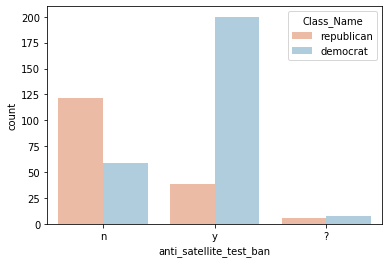

In [9]:
#Podemos verificar que em relação a testes anti satelites democratas votaram massivamente a favor 
ax = sns.countplot(x='anti_satellite_test_ban',hue='Class_Name', data= votes, palette='RdBu')

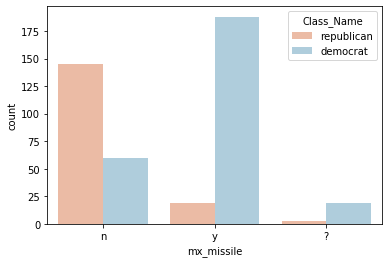

In [10]:
#Podemos verificar que em relação a misseis democratas votaram massivamente a favor 
ax = sns.countplot(x='mx_missile',hue='Class_Name', data= votes, palette='RdBu')

In [24]:
# O KNN (K vizinhos mais próximos) é utilizado em dados já classificados e quando passamos novos dados o algoritimo vai tentar classifica-lo
# ele calcula a distancia entre o novo ponto e todos os pontos ja classificados e em um exemplo onde temos um k=3 ele vai 
#buscar os tres pontos mais proximos e vai atribuir o novo ponto a classe predominante ou seja a que tiver mais pontos proximos
#Por padrão a metodologia de calculo da distancia é o minkowski porém com p = 2 fica exatamente igual a euclidiana
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

#Importando o algoritmo de classificação KNN

from sklearn.neighbors import KNeighborsClassifier

#criando os vetores com as variaveis preditoras/features = y  e  target/variavel resposta = x
y = votes['Class_Name'].values
X = votes.drop('Class_Name', axis=1).values
X

#Criando o modelo com um k = 6 vizinhos mais proximos
#knn = KNeighborsClassifier(n_neighbors=6)
#knn.fit(X,y)


array([['n', 'y', 'n', ..., 'y', 'n', '?'],
       ['?', 'y', 'y', ..., 'y', 'n', 'n'],
       ['n', 'y', 'y', ..., 'n', 'n', 'y'],
       ...,
       ['n', '?', 'n', ..., 'y', 'n', 'y'],
       ['n', 'n', 'n', ..., 'y', 'n', 'y'],
       ['n', 'y', 'n', ..., 'y', '?', 'n']], dtype=object)